In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

In [33]:
rate_original, data_original = wavfile.read('audios/NubiaCantaDalva.wav')
rate_baixas, data_baixas = wavfile.read('audios/NubiaCantaDalvaPassaAltas.wav')
rate_altas, data_altas = wavfile.read('audios/NubiaCantaDalvaPassaBaixas.wav')
rate_passa, data_passa = wavfile.read('audios/NubiaCantaDalvaPassaBanda.wav')
rate_rejeita, data_rejeita = wavfile.read('audios/NubiaCantaDalvaRejeitaBanda.wav')

In [34]:
freq_data_original = np.fft.fft(data_original)
freq_data_baixas = np.fft.fft(data_baixas)
freq_data_altas = np.fft.fft(data_altas)
freq_data_passa = np.fft.fft(data_passa)
freq_data_rejeita = np.fft.fft(data_rejeita)

In [35]:
frequencias_original = np.fft.fftfreq(len(data_original), d=1/rate_original)
frequencias_baixas = np.fft.fftfreq(len(data_baixas), d=1/rate_baixas)
frequencias_altas = np.fft.fftfreq(len(data_altas), d=1/rate_altas)
frequencias_passa = np.fft.fftfreq(len(data_passa), d=1/rate_passa)
frequencias_rejeita = np.fft.fftfreq(len(data_rejeita), d=1/rate_rejeita)

# Comparação de frequências

In [36]:
def audio_grafico(data, frequencias, freq_data, title):
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.plot(data, color='blue')
    plt.title('Sinal de Áudio: ' + title)
    plt.xlabel('Amostras')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.subplot(2, 1, 2)
    plt.plot(frequencias, np.abs(freq_data), color='blue')
    plt.title('Espectro de Frequências: ' + title)
    plt.xlabel('Frequência (Hz)')
    plt.ylabel('Magnitude')
    plt.xlim(0, 10000)
    plt.grid()
    plt.tight_layout()
    plt.savefig('graficos/NubiaCantaDalva' + title + '.png')

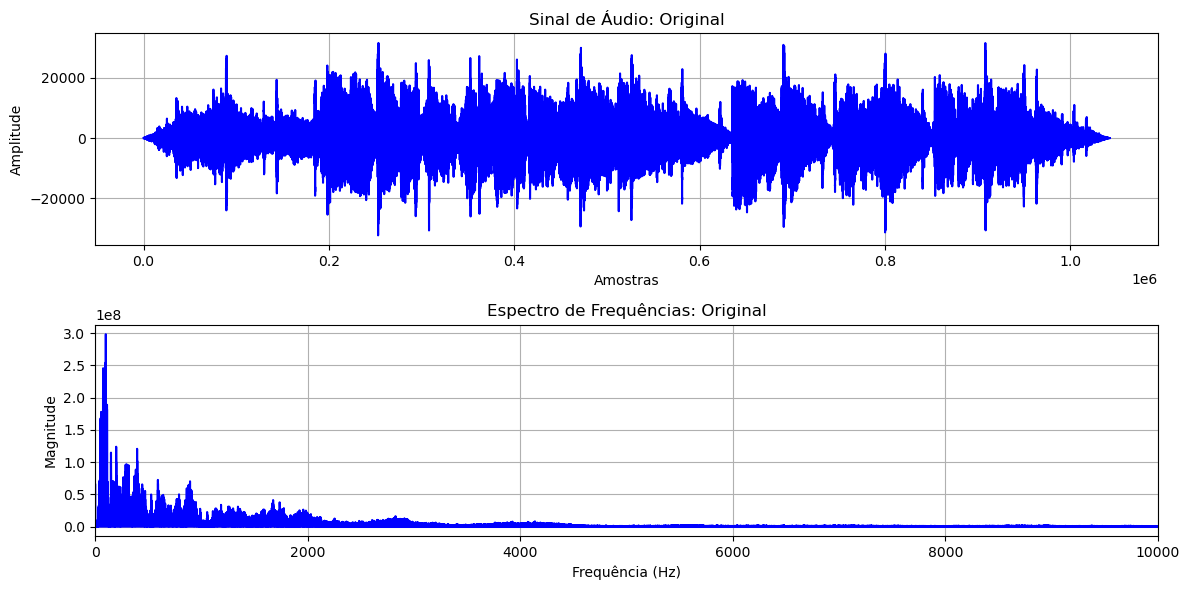

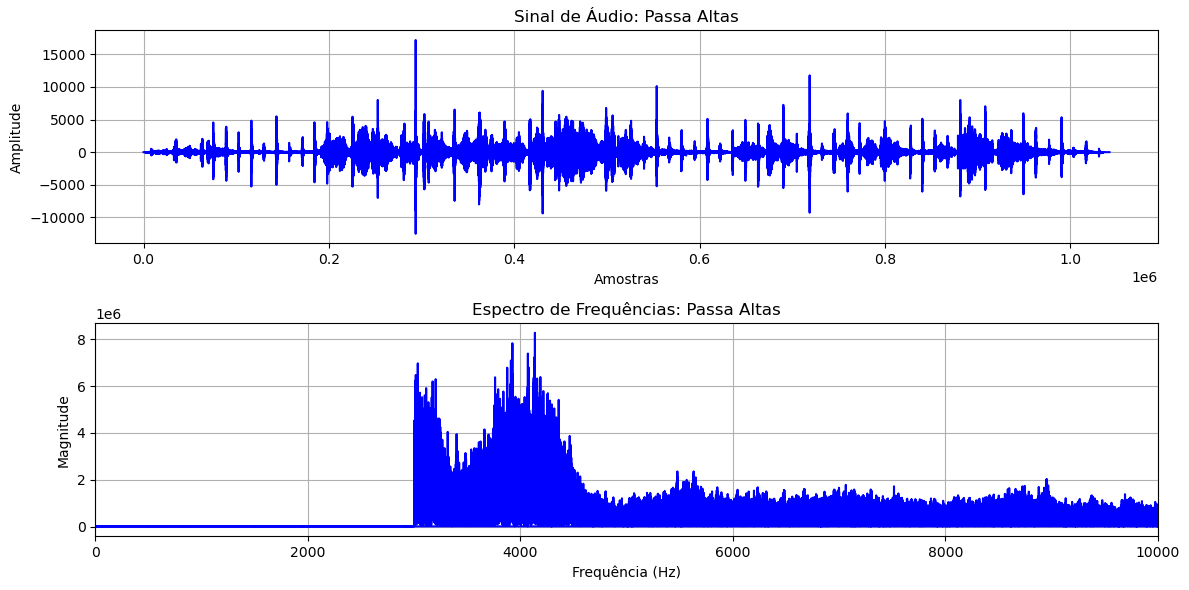

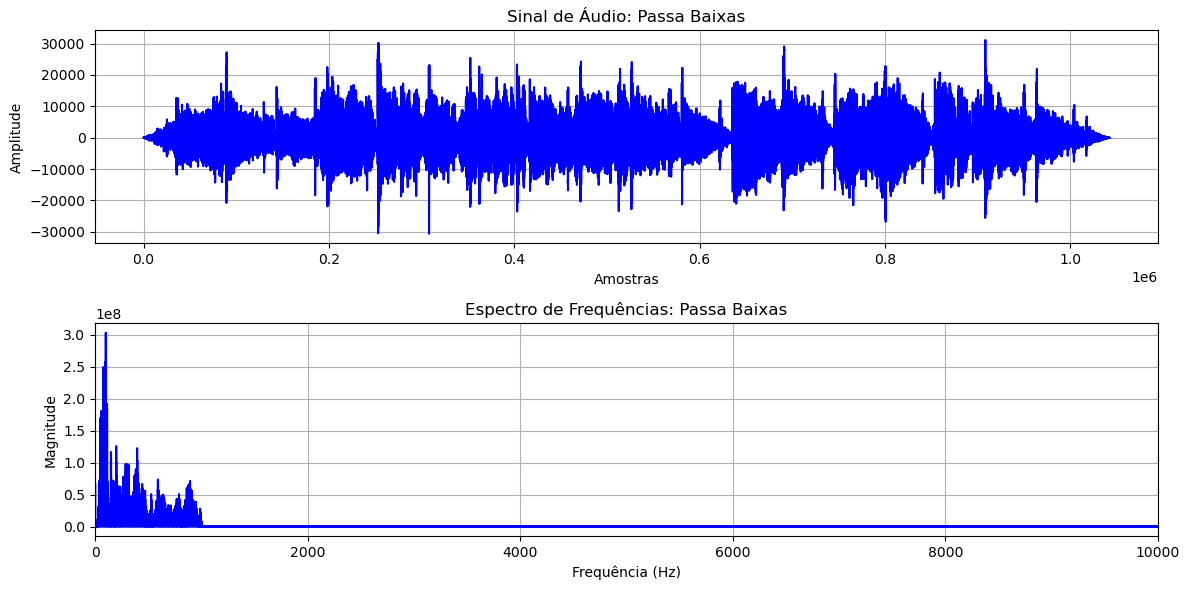

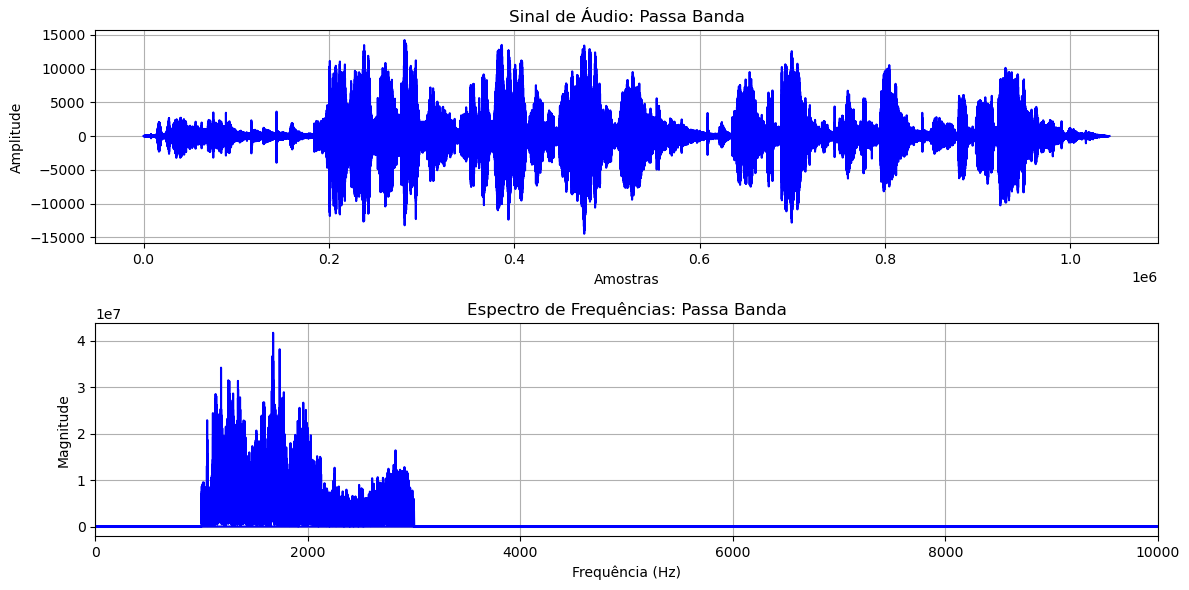

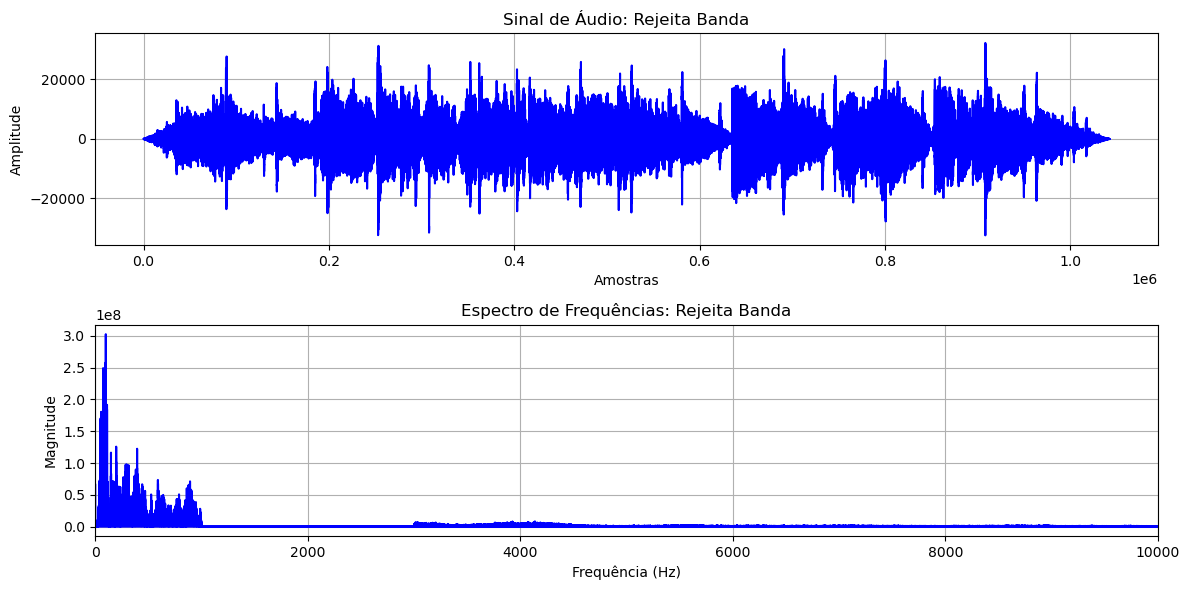

In [37]:
audio_grafico(data_original, frequencias_original, freq_data_original, 'Original')
audio_grafico(data_baixas, frequencias_baixas, freq_data_baixas, 'Passa Altas')
audio_grafico(data_altas, frequencias_altas, freq_data_altas, 'Passa Baixas')
audio_grafico(data_passa, frequencias_passa, freq_data_passa, 'Passa Banda')
audio_grafico(data_rejeita, frequencias_rejeita, freq_data_rejeita, 'Rejeita Banda')
plt.show()